In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Criando o conjunto de dados
data = pd.DataFrame({
    'pH': [3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 3.5, 6.0, 2.0, 7.5, 4.5, 5.0, 2.8, 8.0],
    'Concentracao': ['Concentrada', 'Diluída', 'Concentrada', 'Diluída', 
                     'Concentrada', 'Diluída', 'Concentrada', 'Diluída',
                     'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 
                     'Concentrada', 'Diluída'],
    'Cheiro': ['Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro',
               'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro',
               'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro',
               'Com Cheiro', 'Sem Cheiro'],
    'Classe': ['Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 
               'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 
               'Ácida', 'Básica']
})

data.head(10)

,pH,Concentracao,Cheiro,Classe
0,3.0,Concentrada,Com Cheiro,Ácida
1,5.5,Diluída,Sem Cheiro,Básica
2,2.5,Concentrada,Com Cheiro,Ácida
3,7.0,Diluída,Sem Cheiro,Básica
4,4.0,Concentrada,Com Cheiro,Ácida
5,6.5,Diluída,Sem Cheiro,Básica
6,3.5,Concentrada,Com Cheiro,Ácida
7,6.0,Diluída,Sem Cheiro,Básica
8,2.0,Concentrada,Com Cheiro,Ácida
9,7.5,Diluída,Sem Cheiro,Básica


In [3]:
# Convertendo variáveis categóricas em numéricas
le_concentracao = LabelEncoder()
le_cheiro = LabelEncoder()

data['Concentracao_encoded'] = le_concentracao.fit_transform(data['Concentracao'])
data['Cheiro_encoded'] = le_cheiro.fit_transform(data['Cheiro'])

print(data[['Concentracao', 'Concentracao_encoded', 'Cheiro', 'Cheiro_encoded']].head())

  Concentracao  Concentracao_encoded      Cheiro  Cheiro_encoded
0  Concentrada                     0  Com Cheiro               0
1      Diluída                     1  Sem Cheiro               1
2  Concentrada                     0  Com Cheiro               0
3      Diluída                     1  Sem Cheiro               1
4  Concentrada                     0  Com Cheiro               0


In [4]:
# Separando características (X) e rótulo (y)
X = data[['pH', 'Concentracao_encoded', 'Cheiro_encoded']]
y = data['Classe']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (14, 3)
Shape de y: (14,)


In [5]:
# Dividindo em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 9
Tamanho do conjunto de teste: 5


In [6]:
# Treinando o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


In [7]:
# Fazendo previsões
y_pred = svm_model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo SVM: {accuracy:.2f}')
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia do Modelo SVM: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

      Básica       1.00      1.00      1.00         3
       Ácida       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



Matriz de Confusão:
[[3 0]
 [0 2]]


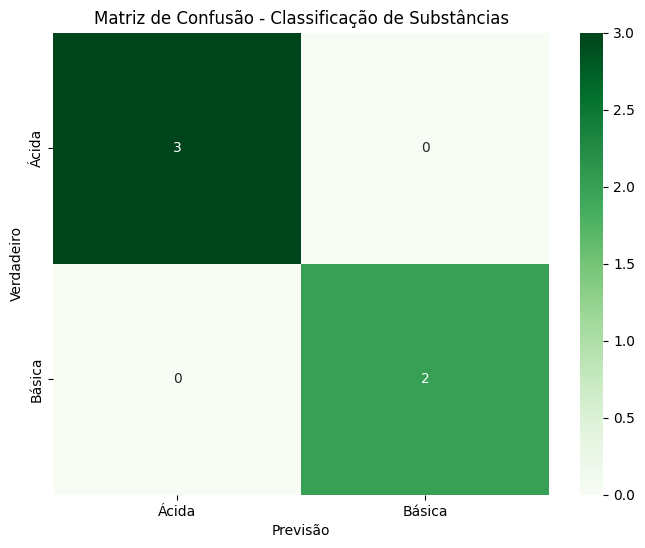

In [8]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(cm)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Ácida', 'Básica'], 
            yticklabels=['Ácida', 'Básica'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de Substâncias')
plt.show()